# Oficina MAT-Tools – Parte 1: Manipulação de Dados com Pandas

In [ ]:
import pandas as pd
import os

## Carregando os dados de um dataset sintético ('Running Example')

In [ ]:
file_path = os.path.join('/content/drive/MyDrive/z ERBD 25 -Oficina MAT-Tools', 'Running_Example.csv')
df = pd.read_csv(file_path)

print(df)

    tid   lat_lon  time  price         poi weather  precip
0     1   0.0 6.2   345     -1        Home   Clear      10
1     1   0.8 6.2   717      2     Library  Clouds      20
2     1    3.1 11  1032      2    Shopping   Clear      10
3     1  4.3 16.9  1179     -1  University   Clear       0
4     1    6 13.1  1344      1  Restaurant   Clear       0
5     1   0.6 6.5  1400     -1        Home   Clear      10
6     2   0.4 6.7   375     -1        Home   Clear      15
7     2  2.5 10.5   610      2     Library  Clouds      15
8     2    3 13.5   740      3  Restaurant  Clouds      20
9     2  5.8 16.5   840     -1  University  Clouds      15
10    2    6.3 13  1283      1  Restaurant   Clear      10
11    2   0.4 6.6  1410     -1        Home   Clear      15
12    3     1 6.8   410     -1        Home   Clear      10
13    3    4 14.5   635      2    Shopping  Clouds      15
14    3  4.3 17.9   855     -1  University  Clouds      15
15    3  6.3 13.1  1080      1  Restaurant   Clear      

### **Vamos iniciar algumas análise sob esses dados**

#### 1. Verificar a quantidade de trajetórias do dataset

Cada linha do dataframe representa um ponto de uma trajetória, e cada trajetória é identificada pela coluna `tid`.

Vamos verificar quantas trajetórias distintas existem:

In [ ]:
# Contando quantas trajetórias existem, analisando (tids) únicos
trajetorias_unicas = df['tid'].nunique()

print(f"Número de trajetórias distintas no dataset: {trajetorias_unicas}")

Número de trajetórias distintas no dataset: 3


#### 2. Ver a distribuição de pontos por trajetória

Além de saber quantas trajetórias há, é interessante ver quantos pontos compõem cada uma:

In [ ]:
# Contando quantos pontos existem por trajeto (tid)
pontos_por_trajetoria = df['tid'].value_counts().sort_index()

print("Número de pontos por trajetória:")
print(pontos_por_trajetoria)

Número de pontos por trajetória:
tid
1    6
2    6
3    5
Name: count, dtype: int64


#### 2.1. Atividades

a. Qual a trajetória mais longa do dataset?
(maior quantidade de pontos)

In [ ]:

tid_mais_longa = pontos_por_trajetoria.idxmax() # qual é o índice do maior valor em uma Serie.
num_pontos = pontos_por_trajetoria.max() # retorna o maior valor em uma Serie

print(f"\nA trajetória com mais pontos é a de ID {tid_mais_longa}, com {num_pontos} pontos.")


A trajetória com mais pontos é a de ID 1, com 6 pontos.


b. O dataset refere-se a trajetórias diárias de um individuo, ao longo de diferentes dias. O campo `time` do dataset está ajustado em minutos do dia. Faça o ajuste para que o tempo apareça em HH:mm

In [ ]:
## Sua resposta:

,tid,time,time_str
0,1,345,05:45
1,1,717,11:57
2,1,1032,17:12
3,1,1179,19:39
4,1,1344,22:24


c. Em que horário esse individuo costuma ir ao restaurante?

In [ ]:
#Dicas:
# Filtrar apenas os pontos onde o POI é 'Restaurant'
# Mostrar os horários convertidos


Horários em que o indivíduo visitou restaurantes:


,tid,time,time_str,poi
4,1,1344,22:24,Restaurant
8,2,740,12:20,Restaurant
10,2,1283,21:23,Restaurant
15,3,1080,18:00,Restaurant
16,3,1335,22:15,Restaurant


### **3. Visualizando uma Trajetória no Espaço 2D (lat_lon)**

A coluna lat_lon está em um formato tipo "lat lon" (separado por espaço). Precisamos separá-la em duas colunas: lat e lon.

In [ ]:
# Separando latitude e longitude em duas colunas
df[['lat', 'lon']] = df['lat_lon'].astype(str).str.split(' ', expand=True).astype(float)

# Verificando
display(df[['tid', 'lat', 'lon']].head())

,tid,lat,lon
0,1,0.0,6.2
1,1,0.8,6.2
2,1,3.1,11.0
3,1,4.3,16.9
4,1,6.0,13.1


#### **3.1. Visualizar uma trajetória (ex: tid = 1) com matplotlib**

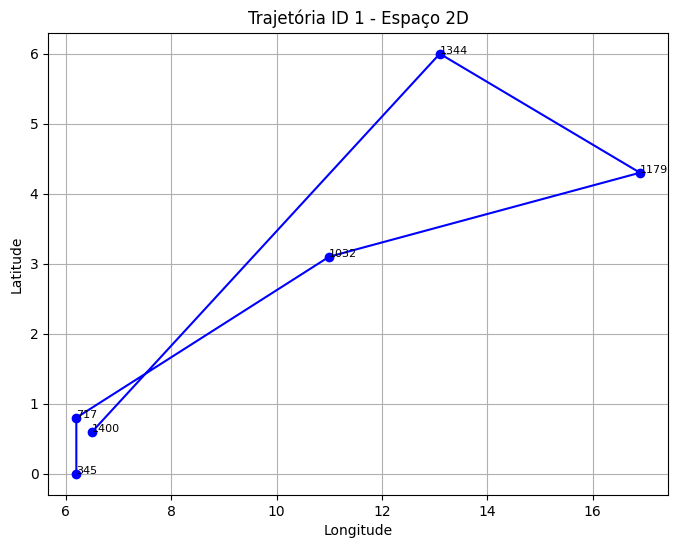

In [ ]:
import matplotlib.pyplot as plt

# Selecionando a trajetória com tid = 1
traj_1 = df[df['tid'] == 1]

# Plotando a trajetória
plt.figure(figsize=(8, 6))
plt.plot(traj_1['lon'], traj_1['lat'], marker='o', linestyle='-', color='blue')
for i, row in traj_1.iterrows():
    plt.text(row['lon'], row['lat'], str(int(row['time'])), fontsize=8)

plt.title('Trajetória ID 1 - Espaço 2D')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

#### **3.2. Visualizar as 3 trajetórias (tid = 1, 2 e 3) no mesmo gráfico**


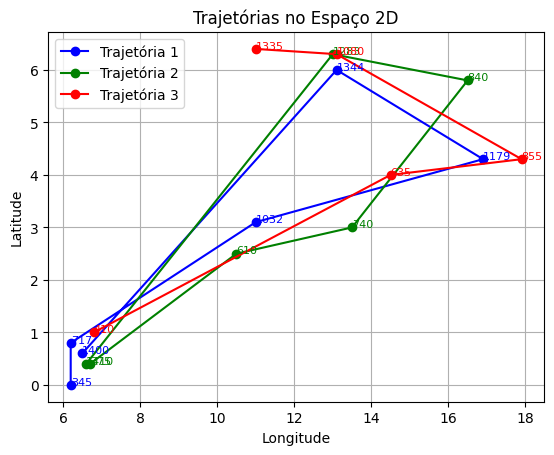

In [ ]:
# Tente plotar o gráfico, usando diferentes cores para as 3 trajetórias

## 4. Manipulação de Dataset real (Foursquare)

In [ ]:
!pip install mat-data

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 28.2 MB/s eta 0:00:00
  Created wheel for geohash: filename=Geohash-1.0-py3-none-any.whl size=15521 sha256=6b0c89ffc5eeb4c6783f2d04bbbe32e3d963c3e82140179f671f75987c0a33cf
  Stored in directory: /roo

### Carregando os dados do dataset

In [ ]:
from matdata.dataset import load_ds
dataset = load_ds()
dataset

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


## Atividades:

4.1. Quantidade de trajetórias?

4.2. Quantidade de usuários?

4.3. Quantidade de trajetórias do usuário 6

4.4. Qual é a atividade mais comum entre todos os usuários. Ver atividades em 'root_type'

4.5. Qual é a atividade mais comum do usuário 6?

In [ ]:
# 4.1. Quantidade de trajetórias?

3079

In [ ]:
#4.2. Quantidade de usuários

193

In [ ]:
#4.3. Quantidade de trajetórias do usuário 6

13

In [ ]:
#4.4. Atividade mais comum entre todos os usuários


Distribuição de atividades por dia:


,count
root_type,
Food,14414
Shop & Service,11308
Travel & Transport,11302
Residence,8850
Professional & Other Places,7674
Outdoors & Recreation,5733
Nightlife Spot,3322
Arts & Entertainment,2338
College & University,1979



A atividade mais comum é: 'Food' com 14414 ocorrências.


In [ ]:
#4.5. Qual é a atividade mais comum do usuário 6?



Distribuição de atividades por dia:


,count
root_type,
Travel & Transport,140
Residence,29
Food,21
Professional & Other Places,20
Outdoors & Recreation,8
Shop & Service,5
College & University,2



A atividade mais comum do usuário 6 é: 'Travel & Transport' com 140 ocorrências.
